<a href="https://colab.research.google.com/github/yuxuan0702/Heart-Disease-Analysis/blob/master/heart-disease-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#import dataset 
df = pd.read_csv("/content/drive/My Drive/第三个学期/ST635group/Dataset/original_data.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [0]:
cat_col = ["male","education","currentSmoker","prevalentStroke","prevalentHyp","diabetes","TenYearCHD"]
df[cat_col] = df[cat_col].astype('category')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             4240 non-null   category
 1   age              4240 non-null   int64   
 2   education        4135 non-null   category
 3   currentSmoker    4240 non-null   category
 4   cigsPerDay       4211 non-null   float64 
 5   BPMeds           4187 non-null   float64 
 6   prevalentStroke  4240 non-null   category
 7   prevalentHyp     4240 non-null   category
 8   diabetes         4240 non-null   category
 9   totChol          4190 non-null   float64 
 10  sysBP            4240 non-null   float64 
 11  diaBP            4240 non-null   float64 
 12  BMI              4221 non-null   float64 
 13  heartRate        4239 non-null   float64 
 14  glucose          3852 non-null   float64 
 15  TenYearCHD       4240 non-null   category
dtypes: category(7), float64(8), int64(1)
memor

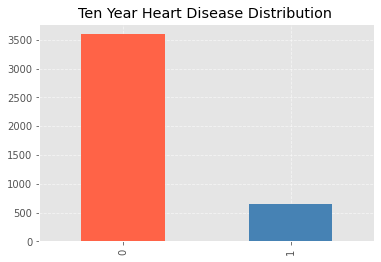

In [0]:
df['TenYearCHD'].value_counts().plot(kind='bar',color = ['tomato','steelblue'],linewidth = 0.8)
plt.title('Ten Year Heart Disease Distribution ')
plt.grid(alpha = 0.6, linestyle= '--')
plt.show()

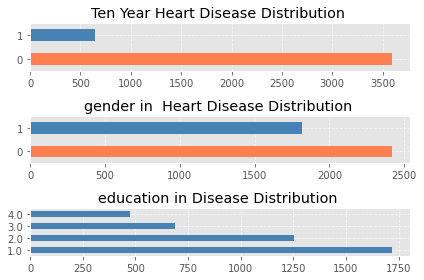

In [0]:
plt.subplot(3,1,1)

df['TenYearCHD'].value_counts().plot(kind='barh',color = ['coral','steelblue'],linewidth = 0.8)
plt.title('Ten Year Heart Disease Distribution ')
plt.grid(alpha = 0.6, linestyle= '--')

plt.subplot(3,1,2)
df['male'].value_counts().plot(kind='barh',color = ['coral','steelblue'],linewidth = 0.8)
plt.title('gender in  Heart Disease Distribution ')
plt.grid(alpha = 0.6, linestyle= '--')

plt.subplot(3,1,3)
df['education'].value_counts().plot(kind='barh',color = ['steelblue'],linewidth = 0.8)
plt.title('education in Disease Distribution ')
plt.grid(alpha = 0.6, linestyle= '--')

plt.tight_layout()
plt.show()

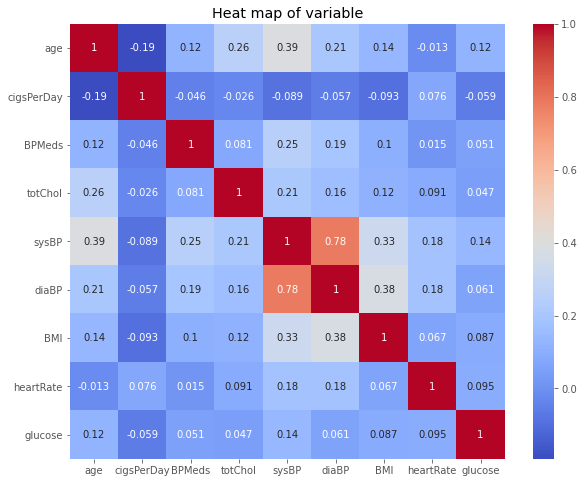

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),square = True, annot = True, cmap = 'coolwarm')
plt.title('Heat map of variable')
plt.show()

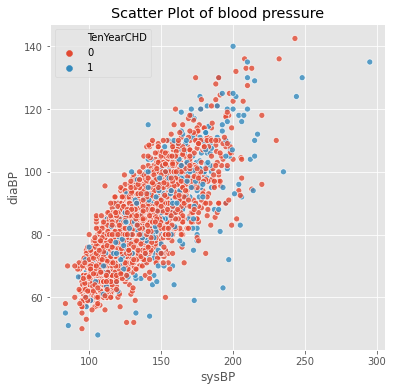

In [0]:
#cigs per day 
plt.figure(figsize=(6,6))
sns.scatterplot(data = df, x='sysBP', y = 'diaBP',hue = 'TenYearCHD',alpha = 0.8)
plt.title('Scatter Plot of blood pressure')
plt.legend()
plt.show()

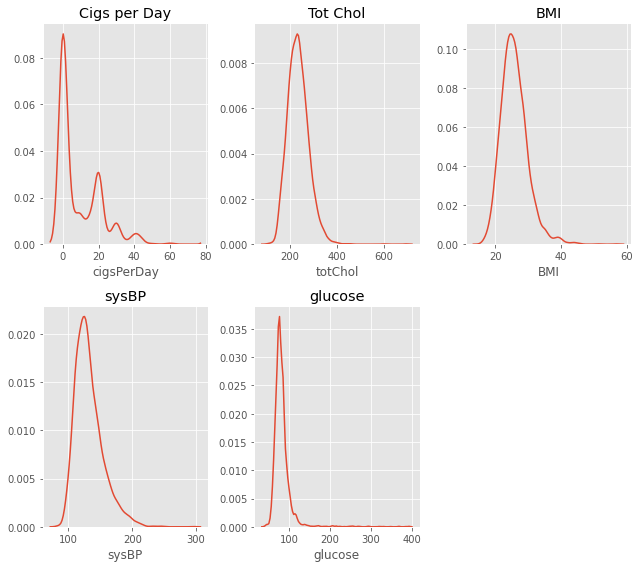

In [0]:
#cigs per day and tot chol today 
plt.figure(figsize = (9,8))
plt.subplot(231)
sns.distplot(df['cigsPerDay'],hist = False, kde= True)
plt.title('Cigs per Day')

plt.subplot(232)
sns.distplot(df['totChol'],hist = False, kde= True)
plt.title('Tot Chol')

plt.subplot(233)
sns.distplot(df['BMI'],hist = False , kde = True)
plt.title('BMI')

plt.subplot(234)
sns.distplot(df['sysBP'],hist = False , kde = True)
plt.title('sysBP')

plt.subplot(235)
sns.distplot(df['glucose'],hist = False , kde = True)
plt.title('glucose')

plt.tight_layout()
plt.show()

In [0]:
# how many people are over avg level in glucose
bins = [0,200,1000]
df['totcol_class'] = pd.cut(df['totChol'],bins = bins, labels = ['normal','bad'])

In [0]:
# how many people are over avg level in glucose
bins = [0,100,1000]
df['glucose_class'] = pd.cut(df['glucose'],bins = bins, labels = ['normal','bad'])

In [0]:
# how many people are over avg level in glucose
bins = [0,18.5,24.9,1000]
df['BMI_class'] = pd.cut(df['BMI'],bins = bins, labels = ['less','normal','over'])

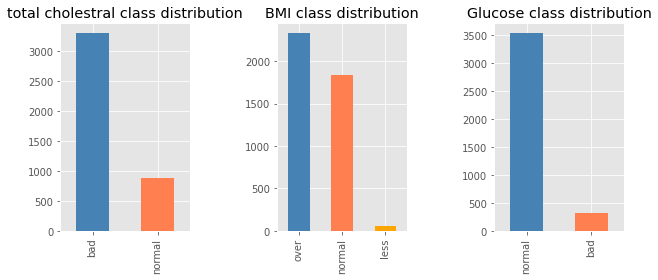

In [0]:
# class distribution of choletral, BMI and Glucose 
plt.figure(figsize = (9,4))
plt.subplot(131)
df['totcol_class'].value_counts().plot(kind='bar',color = ['steelblue','coral'])
plt.title('total cholestral class distribution')
plt.subplot(132)
df['BMI_class'].value_counts().plot(kind='bar',color = ['steelblue','coral','orange'])
plt.title('BMI class distribution')
plt.subplot(133)
df['glucose_class'].value_counts().plot(kind='bar',color = ['steelblue','coral'])
plt.title('Glucose class distribution')
plt.tight_layout()

plt.show()

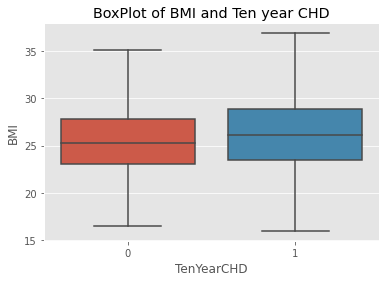

In [0]:
#boxplot glucose 
sns.boxplot(data = df, x = 'TenYearCHD', y = 'BMI', showfliers=False,saturation = 0.75)
plt.title('BoxPlot of BMI and Ten year CHD')
plt.show()

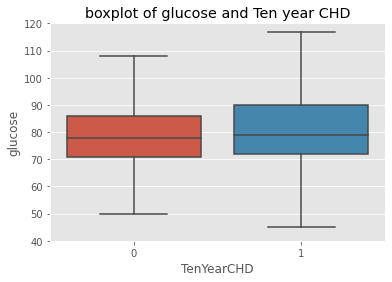

In [0]:
#boxplot glucose 
sns.boxplot(data = df, x = 'TenYearCHD', y = 'glucose', showfliers=False)
plt.title('boxplot of glucose and Ten year CHD')
plt.ylim(40,120)
plt.show()

In [0]:
exp_name = "education"
label_name = 'TenYearCHD'

In [0]:
new_df = (df.groupby(exp_name)[label_name]
            .value_counts(normalize=True)
            .sort_index()
            .unstack()
         )

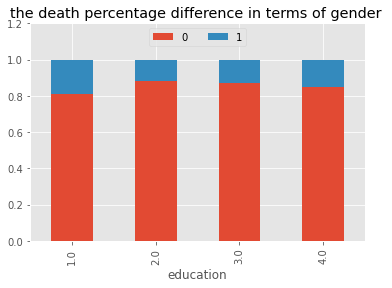

In [0]:
new_df.plot.bar(stacked=True)
plt.title('the death percentage difference in terms of gender ')
plt.ylim(0,1.2)
plt.legend(ncol=2,loc = 'upper center')
plt.show()

In [0]:
exp_name = 'male'
label_name = 'TenYearCHD'

In [0]:
new_df = (df.groupby(exp_name)[label_name]
            .value_counts(normalize=True)
            .sort_index()
            .unstack()
         )

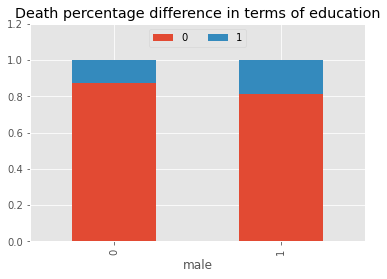

In [0]:

new_df.plot.bar(stacked=True)
plt.title('Death percentage difference in terms of education',loc='center')
plt.legend(ncol=2,loc = 'upper center')
plt.ylim(0,1.2)
plt.show()